# Chapter 21. Confidence Intervals

## 표본평균 (Sample Mean) vs. 모집단평균 (Population Mean)

일반적으로 우리는 모집단 평균을 알고 싶어 하지만, 표본평균을 계산할 수 있을 뿐이다. sample mean 을 이용해 모집단 mean 계산시 얼마나 정확할지 하는 것이 confidence interval 이다.

## 신뢰구간 (Confidence Interval)

If I asked you to estimate the average height of a woman in the USA, you might do this by measuring 10 women and estimating that the mean of that sample was close to the population. Let's try that.

* 표본 통계량에서 파생되어 알 수 없는 모집단 모수 값이 포함될 가능성이 있는 값의 범위 : 95% 신뢰 구간은 한 모집단에서 선택한 20개의 표본 중 19개(95%)가 모집단 모수를 포함하는 신뢰 구간을 생성할 것임을 나타냅니다.

In [1]:
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [3]:
# We'll set a seed here so our runs are consistent
np.random.seed(10)

# Let's define some 'true' population parameters, we'll pretend we don't know these.
POPULATION_MU = 64
POPULATION_SIGMA = 5

# Generate our sample by drawing from the population distribution
sample_size = 10
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
print(heights)
mean_height = np.mean(heights)
print('sample mean: ', mean_height)

[70.65793252 67.57639487 56.27299854 63.95808075 67.10667987 60.3995722
 65.32755793 64.54274263 64.02145715 63.12699895]
sample mean:  64.29904154070394


표본집단의 평균만으로는 특별한 의미가 없다. 왜냐하면 모집단평균과 어떻게 연결되는지 모르기 때문이다. 관련성을 알려면 표본집단의 분산 (variance) 를 보아야 한다. variance 가 클수록 불안정성과 불확실성이 높아진다.

In [22]:
print('sample standard deviation: ', np.std(heights))

sample standard deviation:  5.258470847389528


아직도 많은 의미를 주지 못하므로 표본평균이 모집단평균에 어떻게 연관되는지 실제로 알기위해 표준오차 (standard error) 를 계산해야 한다. stanadard error 는 표본평균의 variance 를 측정하는 것이다.

#### IMPORTANT
standard error 계산은 sample 이 편향되지 않았고, data 가 정규성을 가지고 있으며 독립적이라는 가정을 포함하고 있다. 이러한 조건이 만족되지 못하면 standard error 는 틀린값일 것이다. 이 것을 test 하고 수정하는 방법이 있다.

standard error 공식은,

$$SE = \frac{\sigma}{\sqrt{n}}$$

여기서 $\sigma$ 는 표본의 standard deviation이고 $n$ 은 표본의 갯수이다. 

In [23]:
SE = np.std(heights) / np.sqrt(sample_size)
print('standard error: ', SE)

standard error:  0.5258470847389528


standard error 를 계산하는 scipy stats library 함수가 있다. 

Note that this function by default contains a degrees-of-freedom correction that is often not necessary (for large enough samples, it is effectively irrelevant). You can omit the correction by setting the parameter ddof to 0.

In [24]:
stats.sem(heights, ddof=0)

0.5258470847389528

data 가 정규분포 되었다고 가정하면, standard error 를 이용하여 신뢰구간(confidence interval) 을 계산할 수 있다. 이를 위해 먼저 우리가 원하는 신뢰수준 (confidence level) 을 정하고 (ex. 95%) 얼마나 많은 standard deviation 들이 95 % 를 포함할지 정한다. 

Assuming our data are normally distributed, we can use the standard error to compute our confidence interval. To do this we first set our desired confidence level, say 95%, we then determine how many standard deviations contain 95% of the mass. Turns out that the 95% of the mass lies between -1.96 and 1.96 on a standard normal distribution. When the samples are large enough (generally > 30 is taken as a threshold) the Central Limit Theorem applies and normality can be safely assumed; if sample sizes are smaller, a safer approach is to use a $t$-distribution with appropriately specified degrees of freedom. The actual way to compute the values is by using a cumulative distribution function (CDF). If you are not familiar with CDFs, inverse CDFs, and their companion PDFs, you can read about them [here](https://en.wikipedia.org/wiki/Probability_density_function) and [here](https://en.wikipedia.org/wiki/Cumulative_distribution_function). Look [here](https://en.wikipedia.org/wiki/Student%27s_t-distribution) for information on the $t$-distribution. We can check the 95% number using one of the Python functions. 

NOTE: Be careful when applying the Central Limit Theorem, however, as many datasets in finance are fundamentally non-normal and it is not safe to apply the theorem casually or without attention to subtlety.

We can visualize the 95% mass bounds here.

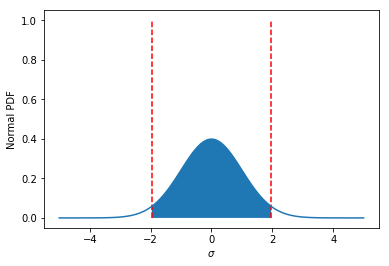

In [25]:
# Set up the x axis
x = np.linspace(-5,5,100)
# Here's the normal distribution
y = stats.norm.pdf(x,0,1)
plt.plot(x,y)

# Plot our bounds
plt.vlines(-1.96, 0, 1, colors='r', linestyles='dashed')
plt.vlines(1.96, 0, 1, colors='r', linestyles='dashed')

# Shade the area
fill_x = np.linspace(-1.96, 1.96, 500)
fill_y = stats.norm.pdf(fill_x, 0, 1)
plt.fill_between(fill_x, fill_y)

plt.xlabel('$\sigma$')
plt.ylabel('Normal PDF');

### Here's the trick

Now, rather than reporting our sample mean without any sense of the probability of it being correct, we can compute an interval and be much more confident that the population mean lies in that interval. To do this we take our sample mean $\mu$ and report $\left(\mu-1.96 SE , \mu+1.96SE\right)$.

This works because assuming normality, that interval will contain the population mean 95% of the time.

신뢰도가 95%로 모평균은 표본평균의 좌우로 표본표준편차의 1.96배 이내에 있다.

신뢰도가 99%로 모평균은 표본평균의 좌우로 표본표준편차의 2.58배 이내에 있다.

결국 구간을 좁히면(우리는 가능하면 이것을 원하죠) 신뢰수준이 떨어지고, 신뢰수준을 높이면(역시 우리가 바라는 겁니다) 구간이 넓어집니다. 

### SUBTLETY:
In any given case, the true value of the estimate and the bounds of the confidence interval are fixed. It is incorrect to say that "The national mean female height is between 63 and 65 inches with 95% probability," but unfortunately this is a very common misinterpretation. Rather, the 95% refers instead to the fact that over many computations of a 95% confidence interval, the true value will be in the interval in 95% of the cases (assuming correct calibration of the confidence interval, which we will discuss later). But in fact for a single sample and the single confidence interval computed from it, we have no way of assessing the probability that the interval contains the population mean. The visualization below demonstrates this. 

In the code block below, there are two things to note. First, although the sample size is sufficiently large to assume normality, we're using a $t$-distribution, just to demonstrate how it is used. Second, the $t$-values needed (analogous to the $\pm1.96$ used above) are being calculated from the inverted cumulative density function, the ppf in scipy.stats. The $t$-distribution requires the extra parameter degrees of freedom (d.o.f), which is the size of the sample minus one. 

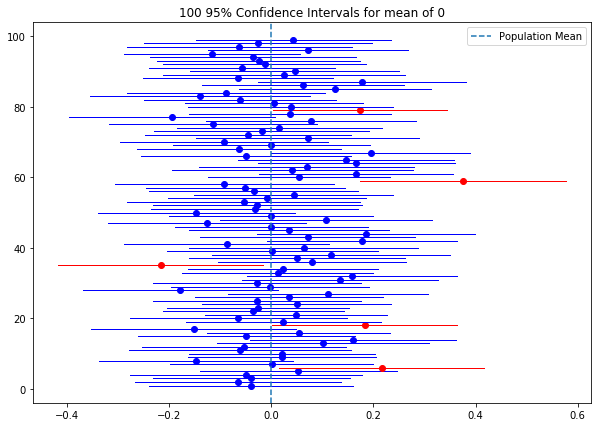

In [8]:
np.random.seed(8309)
n = 100 # number of samples to take
samples = [np.random.normal(loc=0, scale=1, size=100) for _ in range(n)]

fig, ax = plt.subplots(figsize=(10, 7))
for i in np.arange(1, n, 1):
    sample_mean = np.mean(samples[i])  # calculate sample mean
    se = stats.sem(samples[i])  # calculate sample standard error
    h = se*stats.t.ppf((1+0.95)/2, len(samples[i])-1) # calculate t; 2nd param is d.o.f. 
    sample_ci = [sample_mean - h, sample_mean + h]
    if ((sample_ci[0] <= 0) and (0 <= sample_ci[1])):
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='blue', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'bo');
    else:
        plt.plot((sample_ci[0], sample_ci[1]), (i, i), color='red', linewidth=1);
        plt.plot(np.mean(samples[i]), i, 'ro');
plt.axvline(x=0, ymin=0, ymax=1, linestyle='--', label = 'Population Mean');
plt.legend(loc='best');
plt.title('100 95% Confidence Intervals for mean of 0');

### Further Reading

This is only a brief introduction, Wikipedia has excellent articles detailing these subjects in greater depth. Let's go back to our heights example. Since the sample size is small, we'll use a $t$-test.

In [10]:
# standard error SE was already calculated
t_val = stats.t.ppf((1+0.95)/2, 9)  # d.o.f. = 10 - 1
print('sample mean height:', mean_height)
print('t-value:', t_val)
print('standard error:', SE)
print('confidence interval:', (mean_height - t_val * SE, mean_height + t_val * SE))

sample mean height: 64.29904154070394
t-value: 2.2621571627409915
standard error: 1.1889778262717268
confidence interval: (61.60938683466314, 66.98869624674474)


There is a built-in function in scipy.stats for computing the interval. Remember to specify the degrees of freedom.

In [11]:
print('99% confidence interval:', stats.t.interval(0.99, df=9,
                                                   loc=mean_height, scale=SE))
print('95% confidence interval:', stats.t.interval(0.95, df = 9, 
                                                   loc=mean_height, scale=SE))
print('80% confidence interval:', stats.t.interval(0.8, df = 9, 
                                                   loc=mean_height, scale=SE))

99% confidence interval: (60.43505913983995, 68.16302394156793)
95% confidence interval: (61.60938683466314, 66.98869624674474)
80% confidence interval: (62.65465103765395, 65.94343204375393)


Note that as your confidence increases, the interval necessarily widens.

Assuming normality, there's also a built in function that will compute our interval for us. This time you don't need to specify the degrees of freedom. Note that at a corresponding level of confidence, the interval calculated using the normal distribution is narrower than the interval calcuated using the $t$-distribution.

In [12]:
print(stats.norm.interval(0.99, loc=mean_height, scale=SE))
print(stats.norm.interval(0.95, loc=mean_height, scale=SE))
print(stats.norm.interval(0.80, loc=mean_height, scale=SE))

(61.23643761452335, 67.36164546688453)
(61.968687822794635, 66.62939525861324)
(62.77530514604759, 65.82277793536029)


## What does this mean?

Confidence intervals allow us to set our desired confidence, and then report a range that will likely contain the population mean. The higher our desired confidence, the larger range we report. In general, one can never report a single point value, because the probability that any given point is the true population mean is incredibly small. Let's see how our intervals tighten as we change sample size.

In [26]:
np.random.seed(10)

sample_sizes = [10, 100, 1000]
for s in sample_sizes:
    heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, s)
    SE = np.std(heights) / np.sqrt(s)
    print(stats.norm.interval(0.95, loc=mean_height, scale=SE))

(61.968687822794635, 66.62939525861324)
(63.343692029946574, 65.2543910514613)
(64.00593339807287, 64.59214968333501)


## Visualizing Confidence Intervals

Here is some code to visualize a confidence interval on a graph. Feel free to play around with it.

(63.588854219913536, 65.57346359543473)


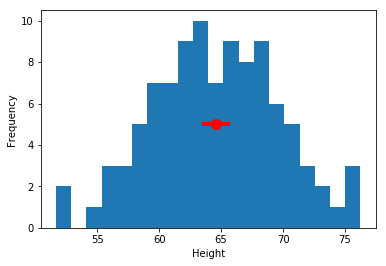

In [27]:
sample_size = 100
heights = np.random.normal(POPULATION_MU, POPULATION_SIGMA, sample_size)
SE = np.std(heights) / np.sqrt(sample_size)
(l, u) = stats.norm.interval(0.95, loc=np.mean(heights), scale=SE)

print((l, u))

plt.hist(heights, bins=20)
plt.xlabel('Height')
plt.ylabel('Frequency')

# Just for plotting
y_height = 5
plt.plot([l, u], [y_height, y_height], '-', color='r', linewidth=4, label='Confidence Interval')
plt.plot(np.mean(heights), y_height, 'o', color='r', markersize=10);

## Miscalibration and Violation of Assumptions

The computation of a standard deviation, standard error, and confidence interval all rely on certain assumptions. If these assumptions are violated then the 95% confidence interval will not necessarily contain the population parameter 95% of the time. We say that in this case the confidence interval is miscalibrated. Here is an example.

### Example: Autocorrelated Data

If your data generating process is autocorrelated, then estimates of standard deviation will be wrong. This is because autocorrelated processes tend to produce more extreme values than normally distributed processes. This is due to new values being dependent on previous values, series that are already far from the mean are likely to stay far from the mean. To check this we'll generate some autocorrelated data according to the following process.

$$X_t = \theta X_{t-1} + \epsilon$$
$$\epsilon \sim \mathcal{N}(0,1)$$

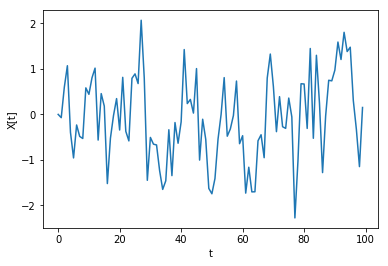

In [17]:
def generate_autocorrelated_data(theta, mu, sigma, N):
    # Initialize the array
    X = np.zeros((N, 1))
    
    for t in range(1, N):
        # X_t = theta * X_{t-1} + epsilon
        X[t] = theta * X[t-1] + np.random.normal(mu, sigma)
    return X

X = generate_autocorrelated_data(0.5, 0, 1, 100)

plt.plot(X);
plt.xlabel('t');
plt.ylabel('X[t]');

It turns out that for larger sample sizes, you should see the sample mean asymptotically converge to zero. This is because the process is still centered around zero, but let's check if that's true. We'll vary the number of samples drawn, and look for convergence as we increase sample size.

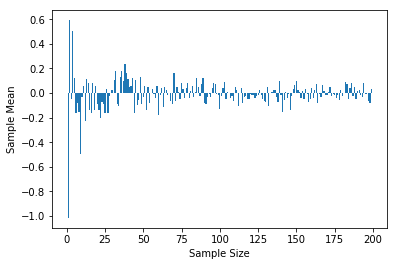

In [18]:
sample_means = np.zeros(200-1)
for i in range(1, 200):
    X = generate_autocorrelated_data(0.5, 0, 1, i * 10)
    sample_means[i-1] = np.mean(X)
    
plt.bar(range(1, 200), sample_means);
plt.xlabel('Sample Size');
plt.ylabel('Sample Mean');

Definitely looks like there's some convergence, we can also check what the mean of the sample means is.

In [19]:
np.mean(sample_means)

-0.008679385229444583

Pretty close to zero. We could also derive symbolically that the mean is zero, but let's assume that we've convinced ourselves with the simple empiral analysis. Now that we know the population mean, we can check the calibration of confidence intervals. First we'll write two helper functions which compute a naive interval for some input data, and check whether the interval contains the true mean, 0.

In [20]:
def compute_unadjusted_interval(X):
    T = len(X)
    # Compute mu and sigma MLE
    mu = np.mean(X)
    sigma = np.std(X)
    SE = sigma / np.sqrt(T)
    # Compute the bounds
    return stats.norm.interval(0.95, loc=mu, scale=SE)

# We'll make a function that returns true when the computed bounds contain 0
def check_unadjusted_coverage(X):
    l, u = compute_unadjusted_interval(X)
    # Check to make sure l <= 0 <= u
    if l <= 0 and u >= 0:
        return True
    else:
        return False

Now we'll run many trials, in each we'll sample some data, compute a confidence interval, and then check if the confidence interval contains the population mean. We'll keep a running tally, and we should expect to see 95% of the trials succeed if the intervals are calibrated correctly.

In [21]:
T = 100
trials = 500
times_correct = 0
for i in range(trials):
    X = generate_autocorrelated_data(0.5, 0, 1, T)
    if check_unadjusted_coverage(X):
        times_correct += 1
    
print('Empirical Coverage: ', times_correct/float(trials))
print('Expected Coverage: ', 0.95)

Empirical Coverage:  0.734
Expected Coverage:  0.95


Clearly the coverage is wrong. In this case we'd need to do what's known as a Newey-West correction on our standard error estimate to account for the autocorrelation. In practice it's important to check for the assumptions you make. It is quick and easy to check if your data are stationary (which implies not autocorrelated), and it can save you a lot of pain and suffering to do so. A normality test such as `Jarque Bera` will also be a good idea, as it may detect certain distribution properties which may violate assumptions of many following statistical analyses.